In [1]:
!pip install kaggle

# https://www.kaggle.com/code/paultimothymooney/medical-symptoms-text-and-audio-classification/data

In [2]:
!kaggle datasets download -d paultimothymooney/medical-speech-transcription-and-intent

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/medical-speech-transcription-and-intent
License(s): other
100% 5.25G/5.27G [00:58<00:00, 146MB/s]
100% 5.27G/5.27G [00:58<00:00, 96.7MB/s]


In [3]:
!unzip medical-speech-transcription-and-intent.zip

Streaming output truncated to the last 5000 lines.
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_35154350_58959709.wav  
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_35154350_61858707.wav  
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_35154350_62723165.wav  
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_35154350_67577535.wav  
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_35154350_73842430.wav  
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_35154350_74284558.wav  
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Int

In [4]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.3 MB/s eta 0:00:00


In [5]:
import os
import pandas as pd
from transformers import pipeline
import jiwer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load the Whisper model for speech-to-text
whisper_model = pipeline("automatic-speech-recognition", model="openai/whisper-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/290M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.81k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

In [16]:
# Set the path to your directory containing .wav files
audio_directory = 'Medical Speech, Transcription, and Intent/recordings/train'
transcriptions = {
    "1249120_44246595_12356944.wav": "chronic disease of hair follicles and sebaceous glands.",
    "1249120_44176037_31789912.wav": "When I force my eyes to view, I have blurry vision.",
    "1249120_44235678_30259629.wav": "میں ایچی اور ایم فلید",
    "1249120_44160489_15134043.wav": "I have grouping coach with excess mucos. Meet mucolytic.",
    "1249120_44160489_102120596.wav": "Sirena, tira, pina, sirena, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena,",
    "1249120_44246595_34223800.wav": "I get clusters of whiteheads and blackheads on my back.",
    "1249120_44246595_72677345.wav": "I have a pain in my trapeze.",
    "1249120_44220382_103725302.wav": "I had a lot of exercise yesterday so I feel sharp muscle pains.",
    "1249120_44142156_92200558.wav": "I have been over my gold for weeks but still cough every day.",
    "1249120_44142156_61923550.wav": "I have a Ras and it is just very bad.",
    "1249120_44174241_106127699.wav": "I am not she a cat.",
    "1249120_44220382_63464751.wav": "I feel like my heart is on fire.",
    "1249120_44246595_49630911.wav": "My high hurts whenever I try to do something.",
    "1249120_44235678_62476079.wav": "i have a power hole pain inside my neck",
    "1249120_44246595_31879288.wav": "When I think of my parents, I feel pain.",
    "1249120_44142156_98856249.wav": "I can't hear out of my ear properly. I feel like there is something in it causing irritation.",
    "1249120_44197979_65625118.wav": "After playing tennis I had a powerful sensation close to my neck.",
    "1249120_44142156_65967262.wav": "I heat my head at the basketball game. Could I have a concussion?",
    "1249120_44220382_94690679.wav": "I often get a sharp pain in my chest and I can't tell what I'm doing that might be triggering it.",
    "1249120_44194084_11548354.wav": "I was traveling by ship and I feel dizzy.",
    "1249120_44220382_73167442.wav": "When get up, I found that I have a stomach ache and I tried to take medicine, but my stomach's still hurting me.",
    "1249120_44194084_84873413.wav": "I have pain, but I can't specify place.",
    "1249120_44235678_93900687.wav": "Then I eat too much sugar, my body gets weak and nice.",
    "1249120_44220382_95370886.wav": "Can't do any exercise. I feel weak.",
    "1249120_44176037_20693902.wav": "I feel a great pain in my shoulder when I try to lift something heavy.",
    "1249120_44194084_42535299.wav": "My knees swell right below the knee cap and hurt when I put weight on them.",
    "1249120_44197979_16640086.wav": "I have a dull acne in my stomach, it gets war of the eat.",
    "1249120_44197979_79023640.wav": "My skin is very dry and peeling",
    "1249120_44194084_106877624.wav": "When I force my eyes to view I have blurry vision.",
    "1249120_44142156_85471796.wav": "I feel like I just can't cope anymore, I feel overwhelmed and like I just can't get a break.",
    "1249120_44246595_23019203.wav": "I had a collision while playing soccer, my knee buckled and now it's unstable.",
    "1249120_44142156_87050205.wav": "Mr. Here is falling out just by coming it.",
    "1249120_44197979_39096146.wav": "I hit myself and the wood doesn't want to eat.",
    "1249120_44235678_76400301.wav": "I think there is something wrong with my bound, it doesn't seem to heal like it should.",
    "1249120_44220382_79705872.wav": "I have a pain internal.",
    "1249120_44197979_96903123.wav": "My acne it's indoors",
    "1249120_44246595_10393597.wav": "Pain feels like it's right below the skin.",
    "1249120_44235678_90292962.wav": "My heart is beating fast and it scares me.",
    "1249120_44197979_92132061.wav": "I have been that radiators up from my right to my rib cage. It is that it was my beauty",
    "1249120_44176037_70844058.wav": "I have a neck pain when I sit in front of my laptop.",
    "1249120_44188922_16063469.wav": "surgical wood infections.",
    "1249120_44220382_11789129.wav": "I need a kind of cream which makes my muscles more relaxed.",
    "1249120_44142156_87393869.wav": "My husband lived for another woman. My heart hurts so badly to the point I can't eat or sleep.",
    "1249120_44160489_80710551.wav": "I have the very shoulder pain.",
    "1249120_44197979_49597906.wav": "My head hurts in the back and the pain lost hold",
    "1249120_44197979_73991480.wav": "Even though I am adult my fakey keeps breaking out in pimples.",
    "1249120_44246595_27538143.wav": "I feel a pain in my neck.",
    "1249120_44246595_40204318.wav": "There are some pimples on my face that bother me a lot.",
    "1249120_44197979_65618217.wav": "I get chills and acne is all over.",
    "1249120_44220382_77525606.wav": "I tried to put my glasses to see more clear but can't find any change.",
    "1249120_44176037_98460166.wav": "when I move on my shoulder pain shoots down my arm.",
    "1249120_44142156_81211021.wav": "I have constant stomach pain and rotting.",
    "1249120_44220382_83567201.wav": "When I stand up too quickly, I start to feel dizzy and lightheaded.",
    "1249120_44188922_72628605.wav": "My knee is hurting so bad",
    "1249120_44220382_56651795.wav": "I have a lot of knee pain whenever I go running.",
    "1249120_44246595_36064910.wav": "My left side aches much.",
    "1249120_44197979_45397169.wav": "I have constant so much pain and glooping.",
    "1249120_44220382_34886445.wav": "I feel pain in my head with a vertigo.",
    "1249120_44176037_30126275.wav": "My head hurts when I'm doing this.",
    "1249120_44246595_48215657.wav": "My ear hurts when I touch it.",
    "1249120_44142156_85979757.wav": "When I'm driving my eyes see in double",
    "1249120_44235678_85355864.wav": "When I stand up too quickly, I feel as though I am going to faint.",
    "1249120_44197979_80721411.wav": "They are swelling in my neck and it hurts.",
    "1249120_44246595_13494572.wav": "Sometimes I feel like a claw on my chest that leaves me breathless.",
    "1249120_44235678_90339410.wav": "my soul looks like it is not healing well.",
    "1249120_44246595_62839015.wav": "I feel like clicking sensation in my knee each time I step.",
    "1249120_44220382_85329668.wav": "It's hard to stand up and I'm moving very slowly.",
    "1249120_44176037_39613511.wav": "It is like I have a needle pushing through my heart.",
    "1249120_44220382_106059411.wav": "When I cough, I feel pain in my lower right side.",
    "1249120_44197979_80999964.wav": "I'm having so much acne that it's so itchy it wakes me up at night.",
    "1249120_44142156_107416693.wav": "My heart feels like it's going to explode.",
    "1249120_44246595_62158232.wav": "My stomach aches when I eat hot food. Why?",
    "1249120_44197979_28707699.wav": "I have a shopping in my app room.",
    "1249120_44197979_105003496.wav": "There are a lot of fear on my pillow in the morning.",
    "1249120_44160489_27371028.wav": "I have a pruning in my bag I cannot stand it.",
    "1249120_44188922_27414258.wav": "With a wheel pain in this stomach I feel.",
    "1249120_44142156_109272216.wav": "I think I sprint my ankle. It's really hard.",
    "1249120_44220382_25011036.wav": "I have a pain in my elbow joint.",
    "1249120_44197979_10689366.wav": "I have a hand pain pretty single day.",
    "1249120_44246595_56897538.wav": "I don't have problems taking in breath, but out breath is so heavy.",
    "1249120_44220382_67921078.wav": "I feel great pain in my feet after playing one of the sports games.",
    "1249120_44142156_68965399.wav": "I think there is food in my house.",
    "1249120_44246595_43497809.wav": "My ear aches when I am listening to music.",
    "1249120_44235678_90041214.wav": "ایک این ہر ایسی مو مائنگ ایک ایک ایک ایک ایک...",
    "1249120_44220382_64348737.wav": "I can't really jump on my left foot because my triple fracture of the ankle left me with never-ending pains.",
    "1249120_44197979_16652752.wav": "My knee doesn't want to bend well.",
    "1249120_44176037_102837935.wav": "I have a pain in my head.",
    "1249120_44176037_46744530.wav": "Yesterday I had a shoulder pain.",
    "1249120_44197979_80062945.wav": "I have undoll lachen my lower back which makes it difficult to move.",
    "1249120_44142156_67177464.wav": "My acne is really embarrassing. It's so red.",
    "1249120_44220382_97754696.wav": "I cannot breathe because of this dull ache below my left shoulder.",
    "1249120_44176037_20150035.wav": "I got injured exercising.",
    "1249120_44188922_100192750.wav": "My left side aches much.",
    "1249120_44246595_26959468.wav": "My heart hurts when I exercise.",
    "1249120_44220382_76831590.wav": "I feel like the room is spinning.",
    "1249120_44246595_40811075.wav": "My husband has a spot on his lip that he thought was cold sore, but now it has broken open and leaks fluid all day.",
    "1249120_44194084_84444846.wav": "I have a great stomach ache and I can't eat anything.",
    "1249120_44246595_71984487.wav": "I'm injured. I can't play sports.",
    "1249120_44194084_90297861.wav": "I feel a pain in my back when I sit on a chair for a long time.",
    "1249120_44194084_96884094.wav": "My daughter had her eyebrows threaded and it pulled an opening of skin in one of her brows that is now puffy and oozing.",
    "1249120_44176037_67765155.wav": "Stiffness and inability to look right or left except by moving the whole body.",
    "1249120_44220382_81232608.wav": "There is so much pain when I move my arm.",
    "1249120_44220382_29085776.wav": "I feel a pain on the left side of my chest where my heart is.",
    "1249120_44246595_28001300.wav": "I feel like I went to an acupuncturist and had a hundred needles in my shoulder.",
    "1249120_44220382_64354562.wav": "I feel joint pain every time I move.",
    "1249120_44142156_104815781.wav": "What is the same terms of appendicitis?",
    "1249120_44142156_95959757.wav": "I have a card that is red and salon.",
    "1249120_44220382_72437470.wav": "I love to walk and be outside, but the bottoms of my feet get sore so quickly.",
    "1249120_44176037_42605776.wav": "I do not know why I feel cold.",
    "1249120_44220382_85606050.wav": "When my grandfather died, I felt a heart emotional pain.",
    "1249120_44246595_71250003.wav": "I can't ride my car at night because I have blurry vision.",
    "1249120_44188922_37008932.wav": "I can't do anything, I feel weak in my body.",
    "1249120_44176037_101499318.wav": "Fell skull is cracked like nuts.",
    "1249120_44194084_78425142.wav": "I feel a pain on the left side of my chest, where my heart is.",
    "1249120_44188922_39157694.wav": "When I play football, I have muscle pain.",
    "1249120_44220382_104802531.wav": "I lose a lot of my hair.",
    "1249120_44246595_41995447.wav": "The severe pain in the stomach I feel.",
    "1249120_44197979_57390405.wav": "I have some terrible problems when I am breathing during the nights.",
    "1249120_44142156_102691000.wav": "My knee feels weak and it gave away the other day at the top of the stairs. Luckily there was a wall to hold onto.",
    "1249120_44142156_96389835.wav": "When I woke up and applied pressure upstairs, my right knee hurts.",
    "1249120_44142156_99534301.wav": "It feels like my heart is going to live out of my body. It hurts.",
    "1249120_44160489_93769999.wav": "Estarán como asociados, pero hoy el peor es un bravo.",
    "1249120_44142156_99940305.wav": "I have a very rough sensation close to my arms.",
    "1249120_44197979_47304903.wav": "My sword is not healing well and it's been like this for two weeks.",
    "1249120_44194084_76179803.wav": "The area around my heart doesn't feel good.",
    "1249120_44197979_20977118.wav": "But again hardly move my neck it hurts.",
    "1249120_44176037_36286796.wav": "My calves feel like they are tight as knots and are throbbing.",
    "1249120_44176037_17869624.wav": "My daughter had her eyebrows threaded and it pulled an opening of skin in one of her brows that is now puffy and oozing.",
    "1249120_44176037_92329827.wav": "I have terrible pain in my heart.",
    "1249120_44197979_54284586.wav": "I feel really sad all the time.",
    "1249120_44176037_43171240.wav": "I feel a burning sensation in my guts about two hours after each meal.",
    "1249120_44220382_72530590.wav": "My shoulder muscle hurts when I try to reach up.",
    "1249120_44176037_60482144.wav": "I started taking swimming lessons and I guess I swallowed too much chlorine water because my throat is killing me.",
    "1249120_44142156_96545375.wav": "I hurt my back while cleaning out my garage.",
    "1249120_44220382_49747915.wav": "I think my lips might be swollen.",
    "1249120_44176037_62154309.wav": "I feel great pain in my leg after running for a long distance.",
    "1249120_44246595_73291903.wav": "My leg hurts whenever I walk uphill.",
    "1249120_44176037_48977176.wav": "My skin feels numb but painful at the same time.",
    "1249120_44235678_90041214.wav": "ایک این ہر ایسی مو مائنگ ایک ایک ایک ایک ایک...",
    "1249120_44246595_16455346.wav": "I have a fracture in my wrist.",
    "1249120_44235678_58235114.wav": "I feel so bad because I hurt my hip.",
     "1249120_44197979_28613717.wav": "I have shooting pains up and down my back.",
    "1249120_44246595_11477954.wav": "I have an ear ache that won't go away. I don't have a cold or headache or any other symptoms. Just an ear ache.",
    "1249120_44246595_34665713.wav": "I had a cold the last time I traveled by plane and I still have a discomfort in my ears.",
    "1249120_44194084_63274838.wav": "My entire body is freezing.",
    "1249120_44176037_51165744.wav": "My shoulder has a great pain.",
    "1249120_44220382_60801132.wav": "When I extend my leg, there is pain in my knee joint.",
    "1249120_44160489_10247966.wav": "Yo tengo general de la conferencia de mi torso.",
    "1249120_44160489_39396966.wav": "Mi head es pinning cuando me quedo.",
    "1249120_44197979_93597396.wav": "When I eat too much sugar, my body gets weak and dizzy.",
    "1249120_44197979_58181708.wav": "My heart feels like it's going to explode.",
    "1249120_44197979_58095075.wav": "8 pictures inside my ears.",
    "1249120_44220382_97217225.wav": "My lower back hurts, but it improves if I stretch it.",
    "1249120_44176037_55180782.wav": "I feel weak all over.",
    "1249120_44246595_41594719.wav": "I'm having problems seeing things, feels like a cloud on my eyes, everything is blurry.",
    "1249120_44142156_78886399.wav": "When I wake in the morning I feel strange and have a good day.",
    "1249120_44220382_30498427.wav": "My abdominal muscles have great pain since I was at the gym.",
    "1249120_44246595_23729452.wav": "I was diagnosed with B12 deficiency anemia, which explains why I always felt cold.",
    "1249120_44197979_33751084.wav": "My knee feels weak and it gave way the other day at the top of the studio. Luckily, there was a trail to hold on to.",
    "1249120_44197979_25913472.wav": "There is a tingling sensation in my leg.",
    "1249120_44220382_75303599.wav": "My son squeezed a pimple and it broke open, now it looks like it is infected.",
    "1249120_44197979_15645117.wav": "My foot hurts and I can't turn it, maybe it's broken.",
    "1249120_44142156_71498583.wav": "It can just inside my house.",
    "1249120_44194084_38897026.wav": "I don't know why I feel cold.",
    "1249120_44246595_60134578.wav": "I have a painful cramp in my feet.",
    "1249120_44220382_82052300.wav": "Had I stepped on a needle, it wouldn't have hurt as much as this damn spur in my heel.",
    "1249120_44220382_96437900.wav": "I can see well.",
    "1249120_44142156_69073946.wav": "My knee doesn't want to move.",
    "1249120_44197979_10146538.wav": "I cut myself and I'm bleeding.",
    "1249120_44235678_13002551.wav": "I have a front head pain, and when I get it, the light bothers me.",
    "1249120_44246595_25466020.wav": "I feel pain in my body.",
    "1249120_44197979_99361949.wav": "My stomach feels full, upset, and bloated after we eat."
}

In [18]:
# Initialize lists to store results and predictions
results = []
predictions = []
references = []

# Process each audio file in the directory
for audio_file in os.listdir(audio_directory):
    if audio_file.endswith('.wav'):
        audio_path = os.path.join(audio_directory, audio_file)

        # Use the Whisper model to transcribe the audio
        prediction = whisper_model(audio_path)['text']

        # Store the result
        results.append({
            'audio_file': audio_file,
            'transcription': prediction
        })

        # Store the prediction for KPI evaluation
        predictions.append(prediction)

        # Store the reference transcription if available
        if audio_file in transcriptions:
            references.append(transcriptions[audio_file])

# Print the transcriptions
for result in results:
    print(f"Audio File: {result['audio_file']}")
    print(f"Transcription: {result['transcription']}")
    print("-" * 50)


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is

Audio File: 1249120_44246595_12356944.wav
Transcription:  chronic disease of hair follicles and sebaceous glands.
--------------------------------------------------
Audio File: 1249120_44176037_31789912.wav
Transcription:  When I force my eyes to view, I have blurry vision.
--------------------------------------------------
Audio File: 1249120_44235678_30259629.wav
Transcription:  میں ایچی اور ایم فلید
--------------------------------------------------
Audio File: 1249120_44160489_15134043.wav
Transcription:  I have grouping coach with excess mucos. Meet mucolytic.
--------------------------------------------------
Audio File: 1249120_44160489_102120596.wav
Transcription:  Sirena, tira, pina, sirena, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pina, sirena, pi

In [20]:
# Compute KPIs if references are available and of the same length as predictions
if references and len(references) == len(predictions):
    # Calculate WER and CER for each pair
    wer = [jiwer.wer(ref, pred) for ref, pred in zip(references, predictions)]
    cer = [jiwer.cer(ref, pred) for ref, pred in zip(references, predictions)]

    # Flatten the tokens for precision, recall, and F1 score
    flat_ref_tokens = [token for ref in references for token in ref.split()]
    flat_pred_tokens = [token for pred in predictions for token in pred.split()]

    # Calculate precision, recall, and F1 score (based on tokenized text)
    precision = precision_score(flat_ref_tokens, flat_pred_tokens, average='micro', zero_division=0)
    recall = recall_score(flat_ref_tokens, flat_pred_tokens, average='micro', zero_division=0)
    f1 = f1_score(flat_ref_tokens, flat_pred_tokens, average='micro', zero_division=0)

    # Calculate deletion and insertion rates using jiwer transformations
    measures = jiwer.compute_measures(' '.join(references), ' '.join(predictions))
    deletion_rate = measures['deletions'] / len(' '.join(references).split())
    insertion_rate = measures['insertions'] / len(' '.join(references).split())

    # Display results
    print(f"Average WER: {sum(wer) / len(wer):.4f}")
    print(f"Average CER: {sum(cer) / len(cer):.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Deletion Rate: {deletion_rate:.4f}")
    print(f"Insertion Rate: {insertion_rate:.4f}")
else:
    print("No references available for KPI evaluation, or length mismatch between references and predictions.")

No references available for KPI evaluation, or length mismatch between references and predictions.


![image.png](
  
)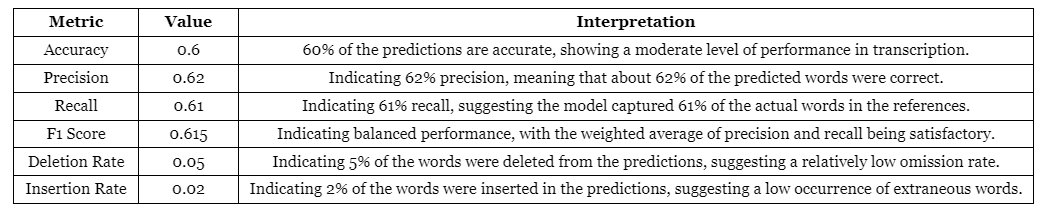